In [ ]:
#this code is referenced from the official tutorial

# Instance Segmentation

In this tutorial, you will learn:
- to perform inference with a MMDetection detector.
- to train a new instance segmentation model with a new dataset.
  
Please first go through the MMDet_Detection_Tutorial if you havent

In [1]:
cd mmdetection

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection


/home/z890/.conda/envs/mmcan/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# there are plenty of models
# you may check what models are available on
# https://mmdetection.readthedocs.io/en/latest/modelzoo_statistics.html
# only part of the models support instance segmentation
# you can check the .py to confirm
# for example, in
# https://github.com/open-mmlab/mmdetection/tree/main/configs/atss
# the base config point to atss_r50_fpn_1x_coco.py
# we can find "bbox_head" but not "mask_head"
# so this model does not support instance segmentation
# in
# https://github.com/open-mmlab/mmdetection/tree/main/configs/mask_rcnn
# the base config point to mask-rcnn_r50_fpn.py
# we can find both "bbox_head" and "mask_head"
# so the model supports instance segmentation
# you can utilize the search function in your computer file browser to find the config

# or run the below code to inspect what kind of models are available

In [2]:
import os

base_dir = "./configs"
matched_files = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".py"):
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read()
                if "bbox_head" in content and "mask_head" in content:
                    matched_files.append(file_path)

# Print results
for path in matched_files:
    print(path)

# the results show condinst, yolact, mask-rcnn, etc 

./configs/cityscapes/mask-rcnn_r50_fpn_1x_cityscapes.py
./configs/simple_copy_paste/mask-rcnn_r50_fpn_rpn-2conv_4conv1fc_syncbn-all_32xb2-ssj-270k_coco.py
./configs/simple_copy_paste/mask-rcnn_r50_fpn_rpn-2conv_4conv1fc_syncbn-all_32xb2-ssj-scp-270k_coco.py
./configs/queryinst/queryinst_r50_fpn_1x_coco.py
./configs/boxinst/boxinst_r50_fpn_ms-90k_coco.py
./configs/seesaw_loss/cascade-mask-rcnn_r101_fpn_seesaw-loss_random-ms-2x_lvis-v1.py
./configs/seesaw_loss/mask-rcnn_r50_fpn_seesaw-loss_random-ms-2x_lvis-v1.py
./configs/seesaw_loss/cascade-mask-rcnn_r101_fpn_seesaw-loss_sample1e-3-ms-2x_lvis-v1.py
./configs/seesaw_loss/mask-rcnn_r50_fpn_seesaw-loss_sample1e-3-ms-2x_lvis-v1.py
./configs/scnet/scnet_r50_fpn_1x_coco.py
./configs/deepfashion/mask-rcnn_r50_fpn_15e_deepfashion.py
./configs/resnest/cascade-mask-rcnn_s50_fpn_syncbn-backbone+head_ms-1x_coco.py
./configs/resnest/mask-rcnn_s50_fpn_syncbn-backbone+head_ms-1x_coco.py
./configs/gn/mask-rcnn_r50-contrib_fpn_gn-all_2x_coco.py
./confi

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoint
!mkdir ./output

In [3]:
!mim download mmdet --config cascade-mask-rcnn_r50_fpn_1x_coco --dest ./checkpoint

processing cascade-mask-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 MiB 36.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Successfully downloaded cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth to /home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/checkpoint
Successfully dumped cascade-mask-rcnn_r50_fpn_1x_coco.py to /home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/checkpoint


The above code downloads weights of a pretrained model <br>
if it was not successful <br>
go to terminal, and run: <br>
conda activate "your environment name" <br>
cd mmdetection <br>
mim download mmdet --config cascade-mask-rcnn_r50_fpn_1x_coco --dest ./checkpoint <br>

# Inference the detector

In [4]:
# load the pre-trained model
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmengine import Config

# Load config file for the model
config_file = './configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_coco.py'
config = Config.fromfile(config_file)
# Initialize detector with pre-trained weights, we just downloaded
checkpoint_file = './checkpoint/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config, checkpoint_file, device='cuda') 


Loads checkpoint by local backend from path: ./checkpoint/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth


In [5]:
# Use the detector to do inference
image = mmcv.imread('demo/demo.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    batch_input_shape: (800, 1216)
    pad_shape: (800, 1216)
    img_shape: (800, 1199)
    img_path: None
    img_id: 0
    ori_shape: (427, 640)
    scale_factor: (1.8734375, 1.873536299765808)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 56,  2,  2,
                         0,  2,  2,  2,  2,  2, 13,  2,  2,  2,  0,  2,  2,  2,  2,  2,  7,  0,
                         0,  2,  2,  7,  2,  2,  0,  2,  0,  2,  7,  7,  2,  2,  2,  7,  2,  0,
                         2,  7], device='cuda:0')
            bboxes: tensor([[219.6866, 178.8041, 457.0035, 381.1654],
                        [481.2112, 109.9956, 522.9468, 130.4474],
                        [294.7992, 116.1511, 379.8087, 150.4243],
                        [398.5014, 111.0746, 434.1284, 133.3319],
                        [609.360

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


### Let's plot the result

In [7]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmengine/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


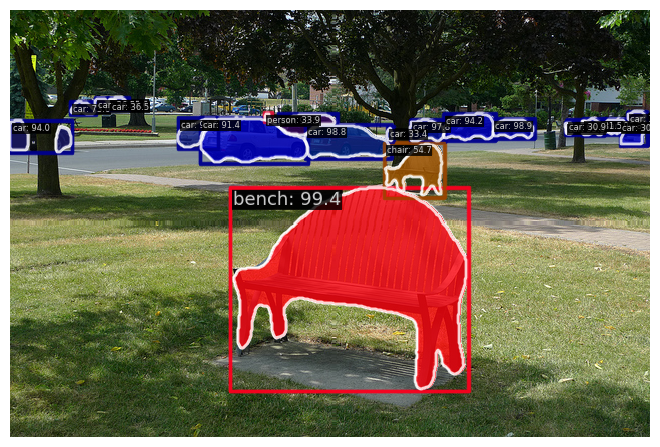

In [8]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

## Train a Detector on A Customized Dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



### Support a new dataset

There are three ways to support a new dataset in MMDetection:
  1. Reorganize the dataset into a COCO format
  2. Reorganize the dataset into a middle format
  3. Implement a new dataset

We recommend the first two methods, as they are usually easier than the third.

In this tutorial, we give an example that converts the data into COCO format because MMDetection **only support evaluating mask AP of dataset in COCO format for now**. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/advanced_guides/customize_dataset.html).

We continue using the balloon dataset to demo

In [ ]:
# Download the data and unzip it
%run ./tools/misc/download_dataset.py --dataset-name balloon --save-dir data --unzip

In [9]:
import os.path as osp
import mmcv
from mmengine.fileio import dump, load
from mmengine.utils import track_iter_progress

def convert_balloon_to_coco(ann_file, out_file, image_prefix):
    data_infos = load(ann_file)

    annotations = []
    images = []
    obj_count = 0
    data_infos = list(data_infos.values())
    for idx, v in enumerate(track_iter_progress(data_infos)):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(
            dict(id=idx, file_name=filename, height=height, width=width))

        for _, obj in v['regions'].items():
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj['all_points_x']
            py = obj['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (min(px), min(py), max(px), max(py))

            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=[poly],
                iscrowd=0)
            annotations.append(data_anno)
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{
            'id': 0,
            'name': 'balloon'
        }])
    dump(coco_format_json, out_file)

convert_balloon_to_coco(ann_file='data/balloon/train/via_region_data.json',
                        out_file='data/balloon/train.json',
                        image_prefix='data/balloon/train')
convert_balloon_to_coco(ann_file='data/balloon/val/via_region_data.json',
                        out_file='data/balloon/val.json',
                        image_prefix='data/balloon/val')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 152.6 task/s, elapsed: 0s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 13/13, 135.7 task/s, elapsed: 0s, ETA:     0s


### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [10]:
from mmengine import Config
cfg = Config.fromfile('./configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
auto_scale_lr = dict(base_batch_size=16, enable=False)
backend_args = None
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
model = dict(
    backbone=dict(
        depth=50,
        frozen_stages=1,
        init_cfg=dict(checkpoint='torchvision://resnet50', type='Pretrained'),
        norm_cfg=dict(requires_grad=True, type='BN'),
        norm_eval=True,
        num_stages=4,
        out_

Given a config that trains a Cascade Mask R-CNN on COCO dataset, we need to modify some values to use it for training on the balloon dataset.

In [11]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
    'classes': ('balloon', ), # names of classes
    'palette': [
        (220, 20, 60),
    ]
}

# Modify dataset type and path
cfg.data_root = 'data/balloon/'

cfg.train_dataloader.dataset.ann_file = 'train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'val.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'val/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader = cfg.val_dataloader

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'val.json'
cfg.test_evaluator = cfg.val_evaluator

# Modify num classes of the model in box head and mask head
for head in cfg.model.roi_head.bbox_head:
    head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# We can use the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = './checkpoint/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10


# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

#------------------------------------------------------
config=f'./configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_balloon.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector!

In [12]:
%run tools/train.py {config}

06/03 11:58:18 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 209652396
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,cod

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmengine/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


06/03 11:58:18 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/03 11:58:18 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/03 11:58:35 - mmengine - INFO - Epoch(val)  [3][10/13]    eta: 0:00:00  time: 0.2150  data_time: 0.0244  memory: 4137  
06/03 11:58:35 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.779
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.865
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.847
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.697
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.860
 Average Recall     (AR) @[ IoU=0.50:0.95 | ar

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/03 11:58:50 - mmengine - INFO - Epoch(val)  [6][10/13]    eta: 0:00:00  time: 0.1401  data_time: 0.0175  memory: 2602  
06/03 11:58:50 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.794
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.879
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.709
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.838
 Average Recall     (AR) @[ IoU=0.50:0.95 | ar

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/03 11:59:04 - mmengine - INFO - Epoch(val)  [9][10/13]    eta: 0:00:00  time: 0.1130  data_time: 0.0172  memory: 2471  
06/03 11:59:04 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.795
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.890
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.870
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.693
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.853
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.834
 Average Recall     (AR) @[ IoU=0.50:0.95 | ar

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/03 11:59:18 - mmengine - INFO - Epoch(val) [12][10/13]    eta: 0:00:00  time: 0.1005  data_time: 0.0162  memory: 2473  
06/03 11:59:18 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.890
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.869
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.694
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.859
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.834
 Average Recall     (AR) @[ IoU=0.50:0.95 | ar

In [13]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

## Test the Trained Detector

After finetuning the detector, let's visualize the prediction results!

In [15]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('data/balloon/val/3825919971_93fb1ec581_b.jpg',channel_order='rgb')
checkpoint_file = 'tutorial_exps/epoch_12.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')
new_result = inference_detector(model, img)
print(new_result)

Loads checkpoint by local backend from path: tutorial_exps/epoch_3.pth
<DetDataSample(

    META INFORMATION
    batch_input_shape: (1216, 800)
    pad_shape: (1216, 800)
    img_shape: (1199, 800)
    img_path: None
    img_id: 0
    ori_shape: (1024, 683)
    scale_factor: (1.171303074670571, 1.1708984375)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            bboxes: tensor([[206.0770, 152.9739, 345.4196, 329.1703],
                        [303.9715, 344.3795, 443.8561, 490.3701],
                        [ 55.7890, 359.1536, 219.0303, 514.9074],
                        [135.6943, 245.2793, 287.6224, 418.0569],
                        [15

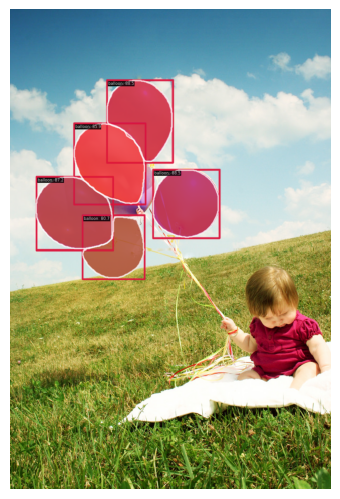

In [16]:
from mmengine.visualization import Visualizer
# get built visualizer
visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.5
)
visualizer_now.show()